# MACHINE LEARNING LAB:

# Submitted by: 
# 17BCE2165   Samarth Gupta

# Exercise – 2 Implement Linear regression using gradient descent algorithm and train & test your # code using any data set of your choice from UCI repository
# Dataset Used Wine dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_csv("../Documents/winequality_white.csv")
raw_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#Feature Scaling 
data=(raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())
data.head()
data.to_csv("ff.csv")


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,2.117145e-15,-1.106593e-15,3.988279e-15,-1.952779e-16,-7.546366e-17,7.012561e-19,-1.792949e-17,1.238818e-13,1.899979e-15,-1.715876e-15,-6.426141e-15,2.646144e-17
std,8.114118e-02,9.881818e-02,7.290350e-02,7.779230e-02,6.483077e-02,5.925832e-02,9.860340e-02,5.766159e-02,1.372733e-01,1.327045e-01,1.984872e-01,1.476064e-01
min,-2.937296e-01,-1.943540e-01,-2.013202e-01,-8.882538e-02,-1.091168e-01,-1.160560e-01,-3.001407e-01,-1.333599e-01,-4.256969e-01,-3.137754e-01,-4.055269e-01,-4.796516e-01
25%,-5.334497e-02,-6.690306e-02,-3.866958e-02,-7.195422e-02,-2.899809e-02,-4.288531e-02,-7.044236e-02,-4.443564e-02,-8.933331e-02,-9.284520e-02,-1.635915e-01,-1.463182e-01
50%,-5.268045e-03,-1.788345e-02,-8.549100e-03,-1.827323e-02,-8.226576e-03,-4.557787e-03,-1.011753e-02,-5.540322e-03,-7.515127e-03,-2.307776e-02,-1.843017e-02,2.034844e-02
75%,4.280888e-02,4.094008e-02,3.361957e-02,5.381266e-02,1.254494e-02,3.725406e-02,6.644859e-02,3.995804e-02,8.339396e-02,6.994549e-02,1.428602e-01,2.034844e-02
max,7.062704e-01,8.056460e-01,7.986798e-01,9.111746e-01,8.908832e-01,8.839440e-01,6.998593e-01,8.666401e-01,5.743031e-01,6.862246e-01,5.944731e-01,5.203484e-01


In [5]:
# Data dimensions, rows and cols
data.shape

(4898, 12)

In [6]:
data.insert(0, 'Ones',1)
data.head()

,Ones,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,0.013963,-0.008080,0.015547,0.219457,-0.002292,0.033770,0.073409,0.134425,-0.171151,-0.046334,-0.276495,0.020348
1,1,-0.053345,0.021332,0.003499,-0.073488,0.009578,-0.074244,-0.014758,-0.000528,0.101576,0.000178,-0.163591,0.020348
2,1,0.119732,0.001724,0.039644,0.007800,0.012545,-0.018495,-0.095964,0.020679,0.065212,-0.057961,-0.066817,0.020348
3,1,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075,0.020348
4,1,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075,0.020348


In [7]:
cols = data.shape[1]
print(cols)

13


In [8]:
x=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]


In [9]:
x = np.matrix(x)
y = np.matrix(y)
theta=  np.zeros([1,12])

In [10]:
x.shape, theta.shape, y.shape
def computeError(x, y, theta):
    inner = np.power(((x*theta.T)-y),2)
    return np.sum(inner)/(2*len(x))

In [11]:
lr=1
iters=150
def gradientdescent(x,y,theta,lr,iters):
    temp= np.matrix(np.zeros(theta.shape))
    params= 12
    cost=np.zeros(iters)
    for i in range(iters):
        error = (x*theta.T)-y
        for j in range(params):
            term = np.multiply(error,x[:,j])
            temp[0,j]=theta[0,j]-((lr/len(x))*np.sum(term))
        theta=temp
        cost[i] = computeError(x,y,theta)
    return theta,cost

In [12]:
new_theta,cost = gradientdescent(x,y,theta,lr,iters)
print(new_theta)


[[ 5.53216562e-15 -6.23939532e-02 -2.46858875e-01  1.54939280e-02
   1.12762752e-01 -7.03180672e-02  9.47815671e-02 -1.22417386e-02
  -2.90552635e-02  3.24408657e-02  5.47045336e-02  3.29473097e-01]]


In [13]:
print(cost[-1])

0.008054210747394269


Text(0.5, 1.0, 'Using Gradient Descent: Error vs. Iterations')

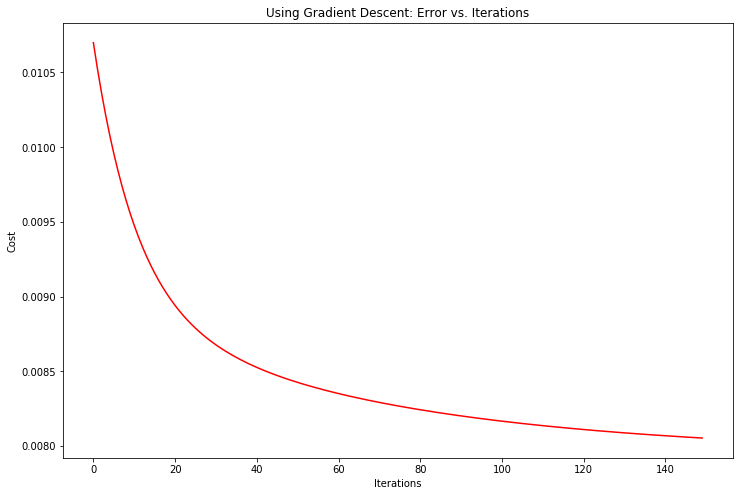

In [20]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Using Gradient Descent: Error vs. Iterations')

In [15]:
print(x)
Model= new_theta[0,0] 
for i in range(1,12):
    Model = Model + (new_theta[0,i]*x[:,i])


[[ 1.00000000e+00  1.39627242e-02 -8.07952826e-03 ... -1.71151490e-01
  -4.63335771e-02 -2.76494685e-01]
 [ 1.00000000e+00 -5.33449681e-02  2.13322364e-02 ...  1.01575782e-01
   1.78050842e-04 -1.63591459e-01]
 [ 1.00000000e+00  1.19731955e-01  1.72439331e-03 ...  6.52121460e-02
  -5.79614840e-02 -6.68172658e-02]
 ...
 [ 1.00000000e+00 -3.41141989e-02 -3.74912930e-02 ... -1.80242399e-01
  -3.47056701e-02 -1.79720492e-01]
 [ 1.00000000e+00 -1.30268045e-01  1.15283149e-02 ...  1.37939419e-01
  -1.27728926e-01  3.68666605e-01]
 [ 1.00000000e+00 -8.21911220e-02 -6.69030577e-02 ...  6.52121460e-02
  -1.97496368e-01  2.07376283e-01]]


In [17]:
import math
erro_r = [np.power((b-a),2) for (a,b) in zip(Model,y)] #mean absolute percent error
error0= np.sum(erro_r)
error = (error0/len(y))*100
print("error % = {}".format(error))
accuracy = 100-error
print("accuracy % = {}".format(accuracy))

error % = 1.6108421494788534
accuracy % = 98.38915785052114


In [18]:
def predict(new_theta,accuracy):
    size = x[555,:]
    
    Model= new_theta[0,0] 
    for i in range(1,12):
        Model = Model + (new_theta[0,i]*x[0,i])

    predicted_price = (Model*(raw_data.quality.max()-raw_data.quality.min()+raw_data.quality.mean()))
    price_at_max_accuracy = (predicted_price *(1/accuracy)*100)
    price_range = price_at_max_accuracy - predicted_price
    return predicted_price, price_range

In [21]:
predicted_price,price_range = predict(new_theta,accuracy)
print('Predicted Wine Quality IS:'+str(predicted_price)+'(+or-)'+str(price_range))

Predicted Wine Quality IS:-0.8850974097855301(+or-)-0.01449094844620169
